In [1]:
!pip install tensorflow pandas matpoltlib sklearn

ERROR: Could not find a version that satisfies the requirement matpoltlib (from versions: none)
ERROR: No matching distribution found for matpoltlib


In [2]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [3]:
df = pd.read_csv('train (2).csv')
# Skip lines with errors & Use python engine for more flexible parsing

In [4]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [6]:
df.iloc[0]['comment_text']

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [7]:
df.iloc[1]['comment_text']

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [8]:
df.iloc[2]['comment_text']

"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."

In [9]:
df.iloc[3]['comment_text']

'"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It\'s listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "'

In [10]:
df.iloc[4]['comment_text']

"You, sir, are my hero. Any chance you remember what page that's on?"

In [11]:
df.iloc[5]['comment_text']

'"\n\nCongratulations from me as well, use the tools well. \xa0· talk "'

In [12]:
df.iloc[6]['comment_text']

'COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK'

In [13]:
df.iloc[7]['comment_text']

"Your vandalism to the Matt Shirvington article has been reverted.  Please don't do it again, or you will be banned."

In [14]:
df[df.columns[2:]]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [15]:
df[df.columns[2:]].iloc[3]

,3
toxic,0
severe_toxic,0
obscene,0
threat,0
insult,0
identity_hate,0


In [16]:
df[df.columns[2:]].iloc[4]

,4
toxic,0
severe_toxic,0
obscene,0
threat,0
insult,0
identity_hate,0


In [17]:
df[df.columns[2:]].iloc[5]

,5
toxic,0
severe_toxic,0
obscene,0
threat,0
insult,0
identity_hate,0


In [18]:
df[df.columns[2:]].iloc[6]

,6
toxic,1
severe_toxic,1
obscene,1
threat,0
insult,1
identity_hate,0


In [19]:
df[df.columns[2:]].iloc[7]

,7
toxic,0
severe_toxic,0
obscene,0
threat,0
insult,0
identity_hate,0


In [20]:
df[df['toxic']==1].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


Preprocess

In [21]:
from tensorflow.keras.layers import TextVectorization

In [22]:
!pip list

Package                               Version
------------------------------------- ------------------
absl-py                               1.4.0
accelerate                            1.6.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.11.15
aiosignal                             1.3.2
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.6
ale-py                                0.11.0
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.9.0
argon2-cffi                           23.1.0
argon2-cffi-bindings                  21.2.0
array_record                          0.7.2
arviz                                 0.21.0
astropy                               7.0.1
astropy-iers-data                     0.2025.5.5.0.38.14
astunparse                            1.6

In [23]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [24]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [25]:
df['comment_text']

,comment_text
0,Explanation\nWhy the edits made under my usern...
1,D'aww! He matches this background colour I'm s...
2,"Hey man, I'm really not trying to edit war. It..."
3,"""\nMore\nI can't make any real suggestions on ..."
4,"You, sir, are my hero. Any chance you remember..."
...,...
159566,""":::::And for the second time of asking, when ..."
159567,You should be ashamed of yourself \n\nThat is ...
159568,"Spitzer \n\nUmm, theres no actual article for ..."
159569,And it looks like it was actually you who put ...


In [26]:
df[df.columns[2:]]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [27]:
df[df.columns[2:]].values

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [28]:
MAX_FEATURES  = 200000 # number of words in the vocab


In [29]:
vectorizer  = TextVectorization(max_tokens=MAX_FEATURES, output_sequence_length = 1800, output_mode = 'int')

In [30]:
X.values

array(["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",
       "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)",
       "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",
       ...,
       'Spitzer \n\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.',
       'And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.',
       '"\nAnd ... I really don\'t think you understand.  I came here and my idea was bad right away.  What kind of communit

In [31]:
vectorizer.adapt(X.values)

In [32]:
type(X)

pandas.core.series.Series

In [33]:
vectorizer.adapt(X.values)

In [34]:
type(X.values)

numpy.ndarray

In [35]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 np.str_('the'),
 np.str_('to'),
 np.str_('of'),
 np.str_('and'),
 np.str_('a'),
 np.str_('you'),
 np.str_('i'),
 np.str_('is'),
 np.str_('that'),
 np.str_('in'),
 np.str_('it'),
 np.str_('for'),
 np.str_('this'),
 np.str_('not'),
 np.str_('on'),
 np.str_('be'),
 np.str_('as'),
 np.str_('have'),
 np.str_('are'),
 np.str_('your'),
 np.str_('with'),
 np.str_('if'),
 np.str_('article'),
 np.str_('was'),
 np.str_('or'),
 np.str_('but'),
 np.str_('page'),
 np.str_('my'),
 np.str_('an'),
 np.str_('from'),
 np.str_('by'),
 np.str_('do'),
 np.str_('at'),
 np.str_('about'),
 np.str_('me'),
 np.str_('so'),
 np.str_('wikipedia'),
 np.str_('can'),
 np.str_('what'),
 np.str_('there'),
 np.str_('all'),
 np.str_('has'),
 np.str_('will'),
 np.str_('talk'),
 np.str_('please'),
 np.str_('would'),
 np.str_('its'),
 np.str_('no'),
 np.str_('one'),
 np.str_('just'),
 np.str_('like'),
 np.str_('they'),
 np.str_('he'),
 np.str_('dont'),
 np.str_('which'),
 np.str_('any'),
 np.str_('been'),
 np

In [36]:
vectorizer("Hello world, life is great")

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([288, 263, 306, ...,   0,   0,   0])>

In [37]:
vectorizer("Hello world, life is great")[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([288, 263, 306,   9, 275])>

In [38]:
vectorized_text = vectorizer(X.values)

In [39]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [40]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None) -> 'DatasetV2'>

In [41]:
#Pipelines creator
#MCSHBAP - map, cache, shuffle batch, prefetch from_tensor_slices, list_files
dataset= tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [42]:
dataset.as_numpy_iterator().next()

(array([[    8,  1548,     3, ...,     0,     0,     0],
        [ 4518,     4,  1136, ...,     0,     0,     0],
        [ 8635, 10808,    16, ...,     0,     0,     0],
        ...,
        [    8,    69,    61, ...,     0,     0,     0],
        [ 4116,   196,     3, ...,     0,     0,     0],
        [   12,   277,     3, ...,     0,     0,     0]]),
 array([[1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [43]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [44]:
batch_X.shape

(16, 1800)

In [45]:
batch_y.shape

(16, 6)

In [46]:
len(dataset)

9974

In [47]:
len(dataset)*.7

6981.799999999999

In [48]:
int(len(dataset)*.7)

6981

In [49]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [50]:
len(test)

997

In [51]:
len(val)

1994

In [52]:
train_generator  = train.as_numpy_iterator()

In [53]:
train_generator.next()

(array([[   472,     10,    472, ...,      0,      0,      0],
        [    37,      8,     33, ...,      0,      0,      0],
        [   865,    635,    179, ...,      0,      0,      0],
        ...,
        [169158,    171,    147, ...,      0,      0,      0],
        [   116,   1749,     76, ...,      0,      0,      0],
        [    29,    597,      9, ...,      0,      0,      0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

Create Sequential Model

In [54]:
from tensorflow.keras.models import Sequential

In [55]:
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [56]:
model = Sequential()

In [57]:
#Create the embedding layer
model.add(Embedding(MAX_FEATURES+1, 32))
#Bidirectional LSTM layer
model.add(Bidirectional(LSTM(32, activation = 'tanh')))
#Feature extractor Fully connected layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
#Final Layer
model.add(Dense(6, activation = 'sigmoid'))

In [58]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [59]:
y.shape

(159571, 6)

In [60]:
y[0]

array([0, 0, 0, 0, 0, 0])

In [61]:
model.compile(loss = 'BinaryCrossentropy', optimizer = 'Adam')

In [62]:
# ... (Model definition mentioned above) ...

# Build the model with input shape
model.build((None, 1800))

# Now call model.summary() to see the updated output
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 1800, 32)       │     6,400,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,491,686 (24.76 MB)

 Trainable params: 6,491,686 (24.76 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
history = model.fit(train, epochs = 1, validation_data = val)

6981/6981 ━━━━━━━━━━━━━━━━━━━━ 690s 98ms/step - loss: 0.0864 - val_loss: 0.0451


In [64]:
history.history

{'loss': [0.06368368119001389], 'val_loss': [0.04509321227669716]}

In [65]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

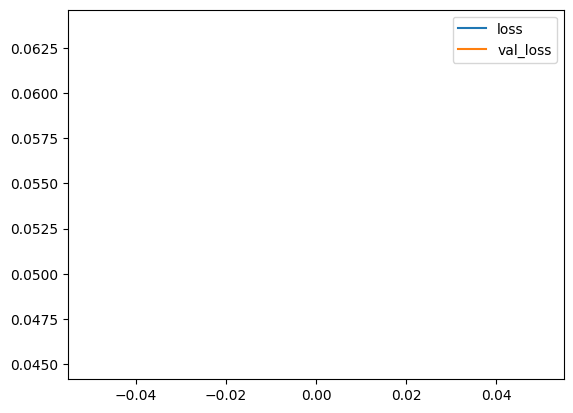

In [66]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

Make Predictions

In [67]:
batch  = test.as_numpy_iterator().next()

In [68]:
input_text = vectorizer('You freaking suck! I am going to hurt you')

In [69]:
input_text

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([   7, 7158,  397, ...,    0,    0,    0])>

In [70]:
batch = test.as_numpy_iterator().next()

In [71]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [72]:
model.predict(np.array([input_text]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


array([[0.9890365 , 0.12000766, 0.92219484, 0.01686982, 0.80222386,
        0.1097425 ]], dtype=float32)

In [73]:
model.predict(np.expand_dims(input_text,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[0.9890365 , 0.12000766, 0.92219484, 0.01686982, 0.80222386,
        0.1097425 ]], dtype=float32)

In [74]:
batch_X

array([[ 3955,     6,   246, ...,     0,     0,     0],
       [   33,     7,   268, ...,     0,     0,     0],
       [  433, 74273,   130, ...,     0,     0,     0],
       ...,
       [  176,    40,     8, ...,     0,     0,     0],
       [17221, 92498,    62, ...,     0,     0,     0],
       [   51,     3,   146, ...,     0,     0,     0]])

In [75]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [76]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [77]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [78]:
model.predict(batch_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


array([[2.84825685e-03, 3.39649569e-06, 6.85346662e-04, 1.60883108e-04,
        3.19114741e-04, 2.46323965e-04],
       [2.26989086e-03, 3.03103047e-06, 5.94125362e-04, 1.45831698e-04,
        2.53601116e-04, 2.24394113e-04],
       [5.23428572e-03, 8.24198833e-06, 1.22815475e-03, 2.99949868e-04,
        6.59629994e-04, 4.44786332e-04],
       [3.34701594e-03, 4.43374938e-06, 8.01230723e-04, 1.92675783e-04,
        3.85193096e-04, 2.94252415e-04],
       [7.95232877e-03, 3.64135121e-05, 2.29092827e-03, 7.49453262e-04,
        1.15813152e-03, 1.14984973e-03],
       [4.63603879e-04, 2.66980663e-07, 1.24652885e-04, 2.63584698e-05,
        3.77119322e-05, 4.44302132e-05],
       [3.27210538e-02, 1.17071504e-04, 7.17195030e-03, 1.92435493e-03,
        5.90758724e-03, 2.59045931e-03],
       [3.61279410e-04, 1.99805072e-07, 1.00181533e-04, 2.11427450e-05,
        2.80619006e-05, 3.63135332e-05],
       [5.99801540e-03, 2.87386138e-05, 1.84597133e-03, 6.21462765e-04,
        8.43513175e-04, 

In [79]:
model.predict(batch_X)>0.5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [ True, False,  True, False,  True, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [80]:
(model.predict(batch_X)>0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [81]:
res = model.predict(np.expand_dims(input_text,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Evaluate model

In [82]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [83]:
pre = Precision()

In [84]:
re = Recall()

In [85]:
acc = CategoricalAccuracy()

In [86]:
for batch in test.as_numpy_iterator():
  #Unpack the patch
  X_true, y_true = batch
  #Make a prediction
  yhat = model.predict(X_true)
  #Flatten the prediction
  y_true = y_true.flatten()
  yhat = yhat.flatten()
  pre.update_state(y_true, yhat)
  re.update_state(y_true,yhat)
  acc.update_state(y_true,yhat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━

In [87]:
res = model.predict(batch_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


In [88]:
res

array([[2.84825685e-03, 3.39649569e-06, 6.85346662e-04, 1.60883108e-04,
        3.19114741e-04, 2.46323965e-04],
       [2.26989086e-03, 3.03103047e-06, 5.94125362e-04, 1.45831698e-04,
        2.53601116e-04, 2.24394113e-04],
       [5.23428572e-03, 8.24198833e-06, 1.22815475e-03, 2.99949868e-04,
        6.59629994e-04, 4.44786332e-04],
       [3.34701594e-03, 4.43374938e-06, 8.01230723e-04, 1.92675783e-04,
        3.85193096e-04, 2.94252415e-04],
       [7.95232877e-03, 3.64135121e-05, 2.29092827e-03, 7.49453262e-04,
        1.15813152e-03, 1.14984973e-03],
       [4.63603879e-04, 2.66980663e-07, 1.24652885e-04, 2.63584698e-05,
        3.77119322e-05, 4.44302132e-05],
       [3.27210538e-02, 1.17071504e-04, 7.17195030e-03, 1.92435493e-03,
        5.90758724e-03, 2.59045931e-03],
       [3.61279410e-04, 1.99805072e-07, 1.00181533e-04, 2.11427450e-05,
        2.80619006e-05, 3.63135332e-05],
       [5.99801540e-03, 2.87386138e-05, 1.84597133e-03, 6.21462765e-04,
        8.43513175e-04, 

In [89]:
res.flatten().shape

(96,)

In [90]:
res.shape

(16, 6)

In [91]:
import numpy as np
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()} Accuracy: {acc.result().numpy()}') # Call acc.result() before .numpy()

Precision: 0.860848069190979, Recall: 0.6140969395637512 Accuracy: 0.4924774467945099


Test and Gradio

In [92]:
!pip install gradio jinja2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.8 MB/s eta 0:00:00


In [93]:
!pip install gradio
import gradio as gr
import tensorflow as tf

In [94]:
model.save('toxicity.h5')

In [95]:
model = tf.keras.models.load_model('toxicity.h5')

In [96]:
input_str = vectorizer('hey I freaken hate you!')

In [97]:
input_str = vectorizer('hey I freaken hate you!')
res = model.predict(np.expand_dims(input_str,0)) # Add this line to give the input_str an outer dimension for the batch

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


In [98]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [99]:
res

array([[0.6073343 , 0.01532771, 0.2537331 , 0.03405134, 0.2925738 ,
        0.06184107]], dtype=float32)

In [100]:
input_str_2 = vectorizer("Hey I freaken hate you! I am coming to hunt you down. I'm going to hurt you!")

In [101]:
res_2 = model.predict(np.expand_dims(input_str_2, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [102]:
res_2

array([[0.55422056, 0.00848815, 0.19226837, 0.02463384, 0.2439048 ,
        0.0445287 ]], dtype=float32)

In [103]:
def score_comment(comment):
  vectorized_comment = vectorizer([comment])
def score_comment(comment):
  vectorized_comment = vectorizer([comment])
  results = model.predict(vectorized_comment)
  text = ' '
  for idx, col in enumerate(df.columns[2:-1]): #added -1 to avoid index out of bounds
    text += '{}: {}\n'.format(col, results[0][idx]>0.5)
  return text

In [104]:
import gradio as gr

interface = gr.Interface(
    fn=score_comment,
    inputs=gr.Textbox(lines=2, placeholder='Comment to score'),
    outputs=gr.Textbox()
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4f0548ba90854babf3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
interface.launch(share= True,debug = True)

Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://4f0548ba90854babf3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Various Visualizations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Let's inspect the dataset
df.head()

# Visualization 1: Distribution of Labels (Toxic, Severe Toxic, Obscene, etc.)
label_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
label_counts = df[label_columns].sum()

# Bar plot for label distribution
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Toxicity Labels')
plt.xlabel('Labels')
plt.ylabel('Count of Comments')
plt.xticks(rotation=45)
plt.show()

# Visualization 2: Distribution of Comment Lengths
df['comment_length'] = df['comment_text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['comment_length'], kde=True, color='blue')
plt.title('Comment Length Distribution')
plt.xlabel('Length of Comment')
plt.ylabel('Frequency')
plt.show()

# Visualization 3: Correlation Heatmap of Toxicity Labels
corr = df[label_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Toxicity Labels')
plt.show()

# Visualization 4: Wordcloud for Toxic Comments (For Example, Toxic Comments)
toxic_comments = df[df['toxic'] == 1]['comment_text']
toxic_text = ' '.join(toxic_comments)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(toxic_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud of Toxic Comments')
plt.show()

# Visualization 5: Confusion Matrix for Classification Model (If You Build a Model)
# Example: Let's create a simple model to predict 'toxic' label

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['comment_text'], df['toxic'], test_size=0.2, random_state=42)

# For simplicity, let's use Logistic Regression with TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Toxic', 'Toxic'], yticklabels=['Non-Toxic', 'Toxic'])
plt.title('Confusion Matrix for Toxicity Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming the dataset 'df' contains the relevant columns
# Example: df = pd.read_csv('your_dataset.csv')

# Let's define the columns for the toxicity labels
label_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Function to create a radar plot for a single row of data (one comment)
def radar_plot(row, labels=label_columns):
    # The values for the labels (e.g., 0 or 1 for toxicity)
    values = row[labels].values.tolist()

    # Number of variables (labels)
    num_vars = len(labels)

    # Compute angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # The radar plot requires the first value to be repeated at the end to close the loop
    values += values[:1]
    angles += angles[:1]

    # Create the radar plot
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    ax.fill(angles, values, color='red', alpha=0.25)
    ax.plot(angles, values, color='red', linewidth=2)

    ax.set_yticklabels([]) # Hide radial ticks

    # Set the labels at the appropriate angles
    ax.set_xticks(angles[:-1]) # Don't duplicate the last label (it will be the same as the first)
    ax.set_xticklabels(labels, color='black', size=12)

    # Set the title of the plot
    ax.set_title(f"Radar Plot for Comment ID: {row['id']}", size=15, color='black')

    plt.show()

# Example usage: Plot the radar chart for a random comment
# Let's take a random row to demonstrate (e.g., first row in the dataset)
radar_plot(df.iloc[0])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is already loaded into `df`
# Add comment_length column if it doesn't already exist
df['comment_length'] = df['comment_text'].apply(len)

# Set the figure size for all plots
plt.figure(figsize=(12, 8))

# Box plot for toxicity labels (each toxicity label distribution)
toxicity_labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Create box plots for each toxicity label
for i, label in enumerate(toxicity_labels):
    plt.subplot(2, 3, i + 1) # 2 rows, 3 columns of subplots
    sns.boxplot(data=df, x=label, color='lightblue')
    plt.title(f'Boxplot: {label} Distribution')

plt.tight_layout()
plt.show()

# Box plot for comment length distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x='comment_length', data=df, color='lightgreen')
plt.title('Boxplot: Comment Length Distribution')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Define the events - we will use the 'toxic' label as an event indicator
# Each index represents a comment and we mark it as an "event" if it is toxic (1)
df['event_toxic'] = df['toxic'] == 1

# Plot the event plot for 'toxic' label
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['event_toxic'], marker='o', color='red', linestyle='-', markersize=3)

# Labeling and title
plt.title('Event Plot for Toxic Comments')
plt.xlabel('Comment Index')
plt.ylabel('Event (Toxic: 1, Non-Toxic: 0)')
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Pie Chart for each toxicity label

# Set up the figure size
plt.figure(figsize=(14, 10))

# Create a pie chart for each toxicity label (0 = non-toxic, 1 = toxic)
toxicity_labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Plot each pie chart
for i, label in enumerate(toxicity_labels):
    plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns of subplots
    label_counts = df[label].value_counts()  # Counts of 0 and 1 for each label
    plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#ff6666'], startangle=90)
    plt.title(f'Pie Chart: {label} Distribution')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Create hexbin plot for 'comment_length' vs. 'toxic' label
plt.figure(figsize=(10, 8))

# Use hexbin to plot comment_length vs toxic label
plt.hexbin(df['comment_length'], df['toxic'], gridsize=30, cmap='Blues', mincnt=1)

# Add color bar to show the count of points in each hexagon
plt.colorbar(label='Count in Bin')

# Set labels and title
plt.xlabel('Comment Length')
plt.ylabel('Toxic Label (0 = Non-toxic, 1 = Toxic)')
plt.title('Hexbin Plot: Comment Length vs Toxicity')

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Prepare data
toxicity_labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
comment_lengths = df['comment_length'].unique()  # Unique comment lengths
counts = np.zeros((len(toxicity_labels), len(comment_lengths)))  # Placeholder for counts

# Count how many comments for each toxicity label and comment length
for i, label in enumerate(toxicity_labels):
    for j, length in enumerate(comment_lengths):
        counts[i, j] = len(df[(df['comment_length'] == length) & (df[label] == 1)])

# Create the 3D bar plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Set bar positions
x_pos, y_pos = np.meshgrid(range(len(comment_lengths)), range(len(toxicity_labels)))

# Flatten positions for plotting
x_pos = x_pos.flatten()
y_pos = y_pos.flatten()
z_pos = np.zeros_like(x_pos)  # Set the base of the bars to zero

# Define the width and depth of the bars
dx = np.ones_like(x_pos)
dy = np.ones_like(y_pos)
dz = counts.flatten()  # Heights of the bars (counts)

# Plot the bars
ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color='b', zsort='average')

# Set the labels for axes
ax.set_xlabel('Comment Length Index')
ax.set_ylabel('Toxicity Label')
ax.set_zlabel('Count of Toxic Comments')

# Set the ticks for y-axis (toxicity labels) and x-axis (comment lengths)
ax.set_yticks(range(len(toxicity_labels)))
ax.set_yticklabels(toxicity_labels)
ax.set_xticks(range(len(comment_lengths)))
ax.set_xticklabels(comment_lengths, rotation=90)

# Set the title
ax.set_title('3D Bar Plot: Toxicity Label vs Comment Length')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Prepare data
toxicity_labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
comment_lengths = df['comment_length'].unique()  # Unique comment lengths
counts = np.zeros((len(toxicity_labels), len(comment_lengths)))  # Placeholder for counts

# Count how many comments for each toxicity label and comment length
for i, label in enumerate(toxicity_labels):
    for j, length in enumerate(comment_lengths):
        counts[i, j] = len(df[(df['comment_length'] == length) & (df[label] == 1)])

# Create meshgrid for surface plot
X, Y = np.meshgrid(comment_lengths, range(len(toxicity_labels)))
Z = counts

# Create the figure and axis for the surface plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Add color bar to the surface plot
fig.colorbar(surf, shrink=0.5, aspect=5)

# Set labels
ax.set_xlabel('Comment Length')
ax.set_ylabel('Toxicity Label')
ax.set_zlabel('Count of Toxic Comments')

# Set the y-tick labels to toxicity labels
ax.set_yticks(range(len(toxicity_labels)))
ax.set_yticklabels(toxicity_labels)

# Set the title
ax.set_title('Surface Plot: Toxicity Label vs Comment Length')

# Show plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Prepare data
toxicity_labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
comment_lengths = df['comment_length'].unique()  # Unique comment lengths
counts = np.zeros((len(toxicity_labels), len(comment_lengths)))  # Placeholder for counts

# Count how many comments for each toxicity label and comment length
for i, label in enumerate(toxicity_labels):
    for j, length in enumerate(comment_lengths):
        counts[i, j] = len(df[(df['comment_length'] == length) & (df[label] == 1)])

# Create meshgrid for voxel plot
x_pos, y_pos = np.meshgrid(comment_lengths, range(len(toxicity_labels)))

# Flatten the grid to get coordinates for the voxels
x_pos = x_pos.flatten()
y_pos = y_pos.flatten()
z_pos = np.zeros_like(x_pos)  # Set the base of the voxels to zero

# Define the size of the voxels
dx = np.ones_like(x_pos)  # width of each voxel
dy = np.ones_like(y_pos)  # depth of each voxel
dz = counts.flatten()  # height (count of toxic comments)

# Create the figure for the voxel plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot voxels
voxels = ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color='b', zsort='average')

# Set labels for axes
ax.set_xlabel('Comment Length')
ax.set_ylabel('Toxicity Label')
ax.set_zlabel('Count of Toxic Comments')

# Set ticks for y-axis (toxicity labels) and x-axis (comment lengths)
ax.set_yticks(range(len(toxicity_labels)))
ax.set_yticklabels(toxicity_labels)
ax.set_xticks(range(len(comment_lengths)))
ax.set_xticklabels(comment_lengths, rotation=90)

# Set the title
ax.set_title('Voxel Plot: Toxicity Label vs Comment Length')

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming df is your dataframe and you have columns like `toxic`, `severe_toxic`, etc.
# Create a count of toxic comments for each label
toxicity_labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
toxicity_counts = [df[label].sum() for label in toxicity_labels]

# Stem plot
plt.figure(figsize=(8, 6))
x = np.arange(len(toxicity_labels))
y = toxicity_counts

plt.stem(x, y, basefmt=" ", linefmt='b-', markerfmt='bo', label="Toxic Comments")
plt.xticks(x, toxicity_labels)
plt.xlabel('Toxicity Labels')
plt.ylabel('Count of Toxic Comments')
plt.title('Stem Plot: Toxic Comments for Each Toxicity Label')
plt.legend()

plt.show()


In [ ]:
# Fill Between Plot: Showing the difference between 'toxic' and 'severe_toxic'
x = df['comment_length']  # Let's assume we are interested in comment length
y1 = df['toxic'].sum()  # Sum of toxic comments
y2 = df['severe_toxic'].sum()  # Sum of severe toxic comments

# Create fill between plot
plt.figure(figsize=(8, 6))
plt.fill_between(x, y1, y2, color='lightblue', alpha=0.5)
plt.plot(x, y1, label='Toxic', color='blue')
plt.plot(x, y2, label='Severe Toxic', color='red')

plt.xlabel('Comment Length')
plt.ylabel('Count of Toxic Comments')
plt.title('Fill Between Plot: Toxic vs Severe Toxic Comments')
plt.legend()

plt.show()

In [ ]:
# Stack Plot: Visualizing part-to-whole relationship of toxicity labels for each comment length
x = df['comment_length'].unique() # Unique comment lengths
y1 = df.groupby('comment_length')['toxic'].sum() # Sum of toxic comments by length
y2 = df.groupby('comment_length')['severe_toxic'].sum() # Sum of severe toxic comments by length
y3 = df.groupby('comment_length')['obscene'].sum() # Sum of obscene comments by length
y4 = df.groupby('comment_length')['threat'].sum() # Sum of threat comments by length
y5 = df.groupby('comment_length')['insult'].sum() # Sum of insult comments by length
y6 = df.groupby('comment_length')['identity_hate'].sum() # Sum of identity hate comments by length

# Create stack plot
plt.figure(figsize=(10, 7))
plt.stackplot(x, y1, y2, y3, y4, y5, y6, labels=toxicity_labels, alpha=0.7)

# Set labels and title
plt.xlabel('Comment Length')
plt.ylabel('Count of Toxic Comments')
plt.title('Stack Plot: Toxicity Labels by Comment Length')

# Add legend
plt.legend(loc='upper left')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: Counts of toxic comments for each toxicity label
toxicity_labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
toxicity_counts = [df[label].sum() for label in toxicity_labels]

# Number of labels
num_labels = len(toxicity_labels)

# Angle for each label
angles = np.linspace(0, 2 * np.pi, num_labels, endpoint=False)

# Create the polar plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')

# Plot the toxicity counts on the polar plot
ax.bar(angles, toxicity_counts, width=0.3, bottom=0.0, color='b', alpha=0.7)

# Set the labels for each segment
ax.set_xticks(angles)
ax.set_xticklabels(toxicity_labels)

# Set the title
ax.set_title('Polar Plot: Toxicity Labels Distribution')

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Example: Assume df is your dataframe with columns: 'toxic', 'severe_toxic', etc.
toxicity_labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Calculate the count of toxic comments for each toxicity label
toxicity_counts = [df[label].sum() for label in toxicity_labels]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(toxicity_labels, toxicity_counts, color='lightblue', edgecolor='black')

# Set labels and title
plt.xlabel('Toxicity Labels')
plt.ylabel('Count of Toxic Comments')
plt.title('Bar Plot: Frequency of Toxic Comments by Toxicity Label')

# Display the plot
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Example: Assume 'df' is your DataFrame and contains 'comment_length' and toxicity labels
# Let's create some example data
np.random.seed(42)
comment_length = np.random.randint(50, 200, size=500) # Random comment lengths
toxic = np.random.randint(0, 2, size=500) # Random binary toxicity
severe_toxic = np.random.randint(0, 2, size=500) # Random binary severe toxicity
obscene = np.random.randint(0, 2, size=500) # Random binary obscene

# Create a DataFrame
df = pd.DataFrame({
    'comment_length': comment_length,
    'toxic': toxic,
    'severe_toxic': severe_toxic,
    'obscene': obscene
})

# Create a grid of x and y values (for comment_length and summed toxicity)
x = np.unique(df['comment_length'])
y = np.arange(0, 3) # Representing the different toxicity labels

# Create a meshgrid for the contour plot
X, Y = np.meshgrid(x, y)

# Compute the Z values (summed toxicity levels across different comment lengths)
Z = np.zeros_like(X, dtype=float)

# Fill the Z array with summed toxicity for each pair of comment_length and toxicity label
for i, label in enumerate(['toxic', 'severe_toxic', 'obscene']):
    for j, length in enumerate(x):
        Z[i, j] = df[df['comment_length'] == length][label].sum()

# Create the contour plot
plt.figure(figsize=(10, 7))
cp = plt.contourf(X, Y, Z, levels=10, cmap='viridis')

# Add colorbar for the contour plot
plt.colorbar(cp)

# Set labels and title
plt.xlabel('Comment Length')
plt.ylabel('Toxicity Labels')
plt.title('Contour Plot: Toxicity Levels Across Comment Lengths')

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example: Assume df is your DataFrame and contains 'comment_length' and toxicity labels
# Let's create some example data
np.random.seed(42)
comment_length = np.random.randint(50, 200, size=500)  # Random comment lengths
toxic = np.random.randint(0, 2, size=500)  # Random binary toxicity
severe_toxic = np.random.randint(0, 2, size=500)  # Random binary severe toxicity
obscene = np.random.randint(0, 2, size=500)  # Random binary obscene

# Create a DataFrame
df = pd.DataFrame({
    'comment_length': comment_length,
    'toxic': toxic,
    'severe_toxic': severe_toxic,
    'obscene': obscene
})

# Create scatter plot for 'comment_length' vs 'toxic' label
plt.figure(figsize=(10, 6))

# Scatter plot for toxic comments
plt.scatter(df['comment_length'], df['toxic'], color='blue', alpha=0.5, label='Toxic')

# Scatter plot for severe toxic comments
plt.scatter(df['comment_length'], df['severe_toxic'], color='red', alpha=0.5, label='Severe Toxic')

# Scatter plot for obscene comments
plt.scatter(df['comment_length'], df['obscene'], color='green', alpha=0.5, label='Obscene')

# Set labels and title
plt.xlabel('Comment Length')
plt.ylabel('Toxicity Labels')
plt.title('Scatter Plot: Comment Length vs Toxicity Labels')

# Add legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Example: Assume df is your DataFrame and contains toxicity labels
# Let's create some example data
np.random.seed(42)
comment_length = np.random.randint(50, 200, size=500)  # Random comment lengths
toxic = np.random.randint(0, 2, size=500)  # Random binary toxicity
severe_toxic = np.random.randint(0, 2, size=500)  # Random binary severe toxicity
obscene = np.random.randint(0, 2, size=500)  # Random binary obscene

# Create a DataFrame
df = pd.DataFrame({
    'comment_length': comment_length,
    'toxic': toxic,
    'severe_toxic': severe_toxic,
    'obscene': obscene
})

# Calculate the correlation matrix
correlation_matrix = df[['toxic', 'severe_toxic', 'obscene']].corr()

# Create the image plot (heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set title
plt.title('Heatmap: Correlation Between Toxicity Labels')

# Display the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

# Example: Assume df is your DataFrame and contains 'comment_length' and toxicity labels
# Let's create some example data
np.random.seed(42)
comment_length = np.random.randint(50, 200, size=500) # Random comment lengths
toxic = np.random.randint(0, 2, size=500) # Random binary toxicity
severe_toxic = np.random.randint(0, 2, size=500) # Random binary severe toxicity
obscene = np.random.randint(0, 2, size=500) # Random binary obscene

# Create a DataFrame
df = pd.DataFrame({
    'comment_length': comment_length,
    'toxic': toxic,
    'severe_toxic': severe_toxic,
    'obscene': obscene
})

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the data: comment_length vs toxic vs severe_toxic
ax.scatter(df['comment_length'], df['toxic'], df['severe_toxic'], color='b', alpha=0.5)

# Set labels
ax.set_xlabel('Comment Length')
ax.set_ylabel('Toxic')
ax.set_zlabel('Severe Toxic')

# Set title
ax.set_title('3D Scatter Plot: Comment Length vs Toxicity Labels')

# Show the plot
plt.show()